# THE FINAL EXAM

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
exam_df = pd.read_csv("exams.csv")
exam_df["avg score"] = exam_df[['math score', 'reading score', 'writing score']].mean(axis=1)
exam_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score
0,male,group A,high school,standard,completed,67,67,63,65.666667
1,female,group D,some high school,free/reduced,none,40,59,55,51.333333
2,male,group E,some college,free/reduced,none,59,60,50,56.333333
3,male,group B,high school,standard,none,77,78,68,74.333333
4,male,group E,associate's degree,standard,completed,78,73,68,73.000000
...,...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65,69.333333
996,male,group D,associate's degree,free/reduced,completed,85,91,92,89.333333
997,female,group C,some high school,free/reduced,none,32,35,41,36.000000
998,female,group C,some college,standard,none,73,74,82,76.333333


## Which gender tested better in Math?

Text(0.5, 1.0, 'Math Score Compared By Gender')

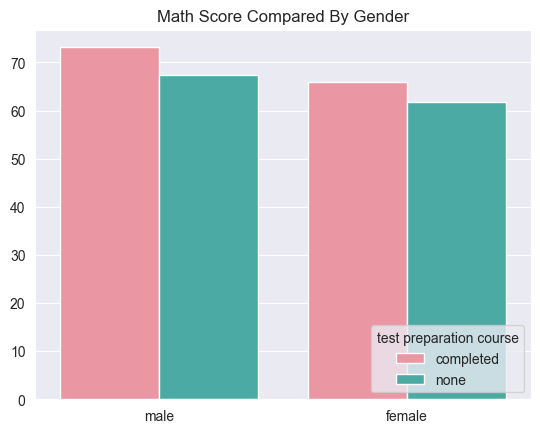

In [102]:
sns.set_style("darkgrid")
sns.set_palette("Set2", 1)
math_graph = sns.barplot(data= exam_df, x = "gender", y="math score", hue = "test preparation course", errorbar=None)
sns.move_legend(math_graph, "lower right")
plt.xlabel("")
plt.ylabel("")
plt.title("Math Score Compared By Gender")

## What is the Mean, Max, and Min scores of each Subject for each Gender?

In [19]:
exam_df.groupby("gender")[["math score", "reading score", "writing score"]].agg(["mean", "max", "min"])

math score          reading score          writing score         
             mean  max min          mean  max min          mean  max min
gender                                                                  
female  63.196687  100  13     71.888199  100  29     71.708075  100  23
male    69.384913  100  29     66.305609  100  27     64.029014  100  23

## Is there any correlation between reading and writing scores?

Text(0.5, 1.0, 'Reading vs Writing Scores')

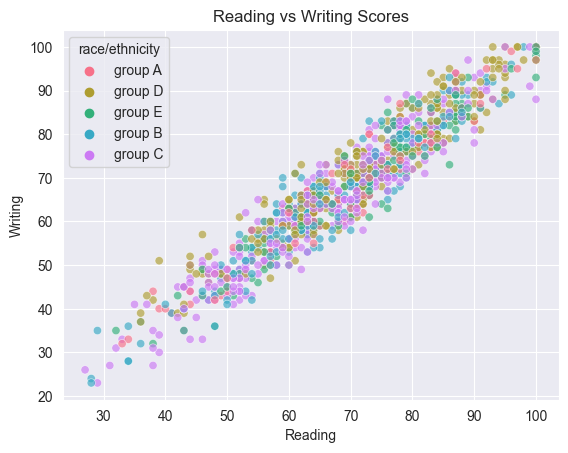

In [103]:
sns.scatterplot(data= exam_df,  x= "reading score", y= "writing score", hue= "race/ethnicity", alpha = .65)
plt.xlabel("Reading")
plt.ylabel("Writing")
plt.title("Reading vs Writing Scores")

## What ethnicity performed better in in each subject?

In [28]:
exam_df.groupby("race/ethnicity")[["math score", "reading score", "writing score"]].agg(['mean', 'max', 'min'])

math score          reading score          writing score       \
                     mean  max min          mean  max min          mean  max   
race/ethnicity                                                                 
group A         65.215190   94  33     68.556962  100  33     66.974684  100   
group B         63.170732   99  25     67.102439   98  28     65.736585  100   
group C         63.130031  100  13     66.383901  100  27     64.523220  100   
group D         69.267176  100  13     72.087786  100  36     72.259542  100   
group E         74.465649  100  33     72.526718  100  32     70.213740  100   

                    
               min  
race/ethnicity      
group A         32  
group B         23  
group C         23  
group D         37  
group E         32

## If scored a 100 in any subject did they complete the test prepartion course?

In [90]:
math_hundreds_df = exam_df[exam_df['math score'] == 100]
reading_hundreds_df = exam_df[exam_df['reading score'] == 100]
writing_hundreds_df = exam_df[exam_df['writing score'] == 100]
dfs = [math_hundreds_df, reading_hundreds_df, writing_hundreds_df]
dfs = pd.concat(dfs).drop_duplicates()
dfs["test preparation course"].value_counts()




completed    20
none         13
Name: test preparation course, dtype: int64

## If parents went to college did they have higher scores?

In [49]:
exam_df.groupby("parental level of education")[["math score", "reading score", "writing score"]].mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,69.536946,70.985222,70.113300
bachelor's degree,71.491071,74.008929,74.410714
high school,65.207921,67.400990,64.846535
master's degree,71.585714,75.428571,75.885714
some college,65.297297,68.045045,66.734234
some high school,60.701571,64.408377,62.539267


## What ethnicity had more parents with higher level education?

Text(0.5, 1.0, "Parents with Associate's Degree")

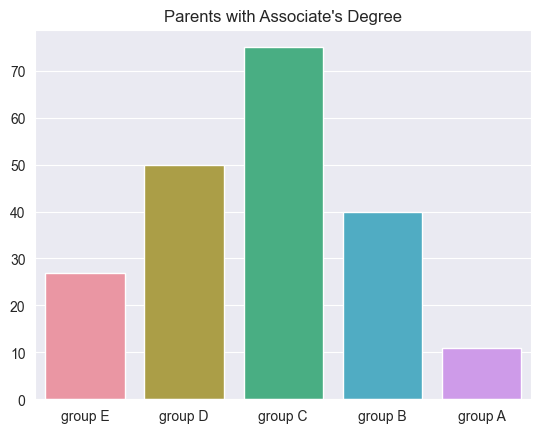

In [104]:
education_df = exam_df[exam_df["parental level of education"] == "associate's degree"]
sns.countplot(data=education_df, x="race/ethnicity")
plt.xlabel("")
plt.ylabel("")
plt.title("Parents with Associate's Degree")

## If kids come from better finicial standing family(standard or paid lunch) did they before better on there test?

Text(0.5, 1.0, 'Overvall Avgerage Score based on Lunch Plan')

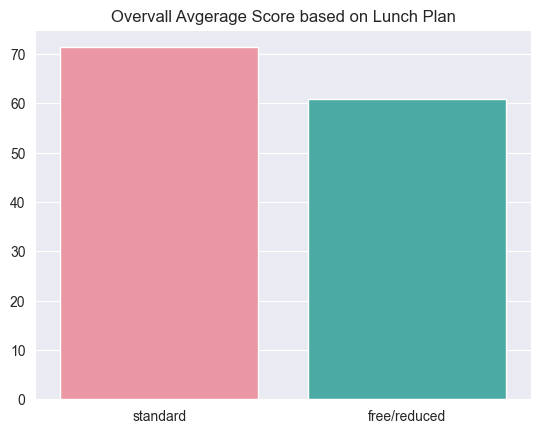

In [105]:
sns.barplot(data= exam_df, x= "lunch", y= "avg score", errorbar= None)
plt.xlabel("")
plt.ylabel("")
plt.title("Overvall Avgerage Score based on Lunch Plan")